In [1]:
import numpy as np 
from si.io.csv_file import read_csv

**1.1. Load the "iris.csv" using the appropriate method for this file type**

In [2]:
dataset = read_csv("/Users/inesglameira/Documents/GitHub/SIB/datasets/iris/iris.csv", sep=",", features=True, label=True)

print("X shape:", dataset.X.shape)
print("y shape:", dataset.y.shape)
print("features:", dataset.features)
print("label:", dataset.label)

X shape: (150, 4)
y shape: (150,)
features: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
label: class


**1.2. Select the penultimate independent variable. What is the dimension of the resulting array?**

In [17]:
penultimate_feature = dataset.X[:, -2]
print("Shape:", penultimate_feature.shape)
penultimate_feature[:10]

Shape: (150,)


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5])

**1.3.  Select the last 10 samples from the iris dataset. What is the mean of the last 10 samples for each independent variable/feature?**

In [18]:
last_10 = dataset.X[-10:]
mean_last_10 = last_10.mean(axis=0)

print("Last 10 shape:", last_10.shape)
print("Mean of last 10 samples:", mean_last_10)

Last 10 shape: (10, 4)
Mean of last 10 samples: [6.45 3.03 5.33 2.17]


**1.4. Select all samples from the dataset with values less than or equal to 6 for all independent variables/features. How many samples do you obtain?**


In [5]:
mask = (dataset.X <= 6).all(axis=1)
selected = dataset.X[mask]

print("Number of samples:", selected.shape[0])
selected[:5]  # primeiros 5

Number of samples: 89


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**1.5. Select all samples with a class/label different from 'Iris-setosa'. How many samples do you obtain?**

In [6]:
mask = dataset.y != "Iris-setosa"
selected = dataset.X[mask]

print("Number of samples:", selected.shape[0])
selected[:5]

Number of samples: 100


array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

**Exemplos de utilização dos métodos do Exercício 2**

A seguir apresentam-se exemplos demonstrativos dos métodos:
- `dropna()`
- `fillna()`
- `remove_by_index()`

Estes métodos foram implementados na classe `Dataset`, tal como pedido no Exercício 2.


**2. Add examples of how to use these methods to the script/notebook of Exercise 1**

In [7]:
"""
Cell: Setup para os exemplos do Exercício 2
Garante que temos a classe Dataset importada e pronta a usar.
"""

from si.data.dataset import Dataset
import numpy as np

print("Dataset importado com sucesso!")


Dataset importado com sucesso!


In [8]:
"""
Exemplo: método dropna()
Remove todas as amostras que contenham pelo menos um valor NaN.
"""

X = np.array([
    [1.0, 2.0],
    [np.nan, 3.0],
    [4.0, np.nan],
    [5.0, 6.0]
], dtype=float)

y = np.array([0, 1, 0, 1])

ds = Dataset(X=X.copy(), y=y.copy(), features=["f1", "f2"], label="lab")

print("Antes do dropna:")
print("X =", ds.X)
print("y =", ds.y)
print("Shape =", ds.X.shape)

ds.dropna()

print("\nDepois do dropna:")
print("X =", ds.X)
print("y =", ds.y)
print("Shape =", ds.X.shape)


Antes do dropna:
X = [[ 1.  2.]
 [nan  3.]
 [ 4. nan]
 [ 5.  6.]]
y = [0 1 0 1]
Shape = (4, 2)

Depois do dropna:
X = [[1. 2.]
 [5. 6.]]
y = [0 1]
Shape = (2, 2)


In [9]:
"""
Exemplo: método fillna() com valor numérico (0.0)
Substitui todos os NaN por 0.0.
"""

ds2 = Dataset(X=X.copy(), y=y.copy(), features=["f1","f2"], label="lab")
ds2.fillna(0.0)

print("X após fillna(0.0):")
print(ds2.X)



X após fillna(0.0):
[[1. 2.]
 [0. 3.]
 [4. 0.]
 [5. 6.]]


In [10]:
"""
Exemplo: método fillna() com 'mean'
Substitui NaN pela média da coluna correspondente.
"""

ds3 = Dataset(X=X.copy(), y=y.copy(), features=["f1","f2"], label="lab")
ds3.fillna("mean")

print("X após fillna('mean'):")
print(ds3.X)


X após fillna('mean'):
[[1.         2.        ]
 [3.33333333 3.        ]
 [4.         3.66666667]
 [5.         6.        ]]


In [11]:
"""
Exemplo: método remove_by_index()
Remove a amostra indicada pelo índice.
"""

ds4 = Dataset(X=X.copy(), y=y.copy(), features=["f1","f2"], label="lab")

print("Antes de remover índice 1:")
print("X =", ds4.X)
print("y =", ds4.y)

ds4.remove_by_index(1)

print("\nDepois de remover índice 1:")
print("X =", ds4.X)
print("y =", ds4.y)

# Exemplo com índice negativo
ds5 = Dataset(X=X.copy(), y=y.copy(), features=["f1","f2"], label="lab")
ds5.remove_by_index(-1)

print("\nApós remover índice -1 (última linha):")
print("X =", ds5.X)
print("y =", ds5.y)


Antes de remover índice 1:
X = [[ 1.  2.]
 [nan  3.]
 [ 4. nan]
 [ 5.  6.]]
y = [0 1 0 1]

Depois de remover índice 1:
X = [[ 1.  2.]
 [ 4. nan]
 [ 5.  6.]]
y = [0 0 1]

Após remover índice -1 (última linha):
X = [[ 1.  2.]
 [nan  3.]
 [ 4. nan]]
y = [0 1 0]


**Exercício 3 — Teste do SelectPercentile**

Nesta secção vamos testar o transformer **SelectPercentile** criado no Exercício 3, usando o dataset `iris.csv`. O objetivo é selecionar um percentil das features com base nos valores F.

In [13]:
from si.feature_selection.select_percentile import SelectPercentile

In [19]:
"""
Aplicar SelectPercentile com percentile=50.
Isto significa selecionar as melhores 50% features (2 em 4).
"""

selector = SelectPercentile(percentile=50.0)

selector.fit(dataset)          # calcular F e p
iris_selected = selector.transform(dataset)

print("Features originais:", dataset.features)
print("Features selecionadas:", iris_selected.features)
print("X shape após seleção:", iris_selected.X.shape)


Features originais: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Features selecionadas: ['petal_length', 'petal_width']
X shape após seleção: (150, 2)


In [21]:
"""
Aplicar SelectPercentile com percentile=50.
Isto significa selecionar as melhores 50% features (2 em 4).
"""

selector = SelectPercentile(percentile=50.0)

selector.fit(dataset)          # calcular F e p
iris_selected = selector.transform(dataset)

print("Features originais:", dataset.features)
print("Features selecionadas:", iris_selected.features)
print("X shape após seleção:", iris_selected.X.shape)


Features originais: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Features selecionadas: ['petal_length', 'petal_width']
X shape após seleção: (150, 2)


In [23]:
import pandas as pd
"""
Mostrar os valores F e p estimados pelo SelectPercentile.
Isto ajuda na defesa do exercício, pois explica porque certas features foram selecionadas.
"""

df_scores = pd.DataFrame({
    "feature": dataset.features,
    "F_value": selector.F_,
    "p_value": selector.p_
})

df_scores


,feature,F_value,p_value
0,sepal_length,119.264502,1.669669e-31
1,sepal_width,47.364461,1.327917e-16
2,petal_length,1179.034328,3.051976e-91
3,petal_width,959.324406,4.376957e-85


In [25]:
"""
Exemplos adicionais: selecionar diferentes percentis.
"""

for p in [25, 75]:
    sel = SelectPercentile(percentile=p)
    sel.fit(dataset)
    new = sel.transform(dataset)
    print(f"\nPercentil {p}%:")
    print("Features selecionadas:", new.features)
    print("X shape:", new.X.shape)



Percentil 25%:
Features selecionadas: ['petal_length']
X shape: (150, 1)

Percentil 75%:
Features selecionadas: ['sepal_length', 'petal_length', 'petal_width']
X shape: (150, 3)


**Exercício 5 — Teste do PCA**

Nesta secção vamos testar a implementação da **classe PCA** desenvolvida no Exercício 5,
recorrendo ao dataset `iris.csv`. O objetivo é reduzir a dimensionalidade das features,
projetando os dados nas componentes principais que explicam a maior parte da variância.

In [1]:
from si.decomposition.pca import PCA

In [6]:
pca = PCA(n_components=2)
pca.fit(dataset)

print("mean_ shape:", pca.mean_.shape)
print("components_ shape:", pca.components_.shape)
print("explained_variance_:", pca.explained_variance_)

mean_ shape: (4,)
components_ shape: (2, 4)
explained_variance_: [0.92461621 0.05301557]


In [7]:
iris_reduced = pca.transform(dataset)
print("Reduced X shape:", iris_reduced.X.shape)
print("New features:", iris_reduced.features)
# mostra primeiras 5 linhas
iris_reduced.X[:5]


Reduced X shape: (150, 2)
New features: ['PC1', 'PC2']


array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456]])

**Exercício 6 — Teste do stratified_train_test_split**

Nesta secção vamos testar a função **stratified_train_test_split** criada no Exercício 6,  
utilizando o dataset `iris.csv`. O objetivo é dividir o dataset em treino e teste de forma  
estratificada, garantindo que a proporção das classes se mantém em ambos os conjuntos.  


In [5]:
from si.model_selection.split import stratified_train_test_split

train_ds, test_ds = stratified_train_test_split(dataset, test_size=0.3, random_state=42)

print("Train:", train_ds.X.shape)
print("Test:", test_ds.X.shape)

# Ver proporções
def props(y):
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts))

print("Proporções originais:", props(dataset.y))
print("Proporções train:", props(train_ds.y))
print("Proporções test:", props(test_ds.y))


Train: (105, 4)
Test: (45, 4)
Proporções originais: {'Iris-setosa': np.int64(50), 'Iris-versicolor': np.int64(50), 'Iris-virginica': np.int64(50)}
Proporções train: {'Iris-setosa': np.int64(35), 'Iris-versicolor': np.int64(35), 'Iris-virginica': np.int64(35)}
Proporções test: {'Iris-setosa': np.int64(15), 'Iris-versicolor': np.int64(15), 'Iris-virginica': np.int64(15)}


**Exercício 7 — Teste do KNNRegressor com RMSE**

Nesta secção vamos testar o regressor **KNNRegressor** implementado no Exercício 7,  
utilizando o dataset `cpu.csv` (regressão). O objetivo é:

- carregar e dividir o dataset em treino e teste (usando `train_test_split`);
- ajustar o `KNNRegressor` aos dados de treino;
- avaliar a performance no conjunto de teste usando a métrica **RMSE**.

Os parâmetros principais a ajustar são `n_neighbors` (k) e o esquema de pesos (`uniform` ou `distance`).



In [8]:
from si.models.knn_regressor import KNNRegressor
from si.metrics.rmse import rmse
from si.model_selection.split import train_test_split

In [10]:
cpu = read_csv("/Users/inesglameira/Documents/GitHub/SIB/datasets/cpu/cpu.csv", sep=",", features=True, label=True)
print("CPU dataset:", cpu.X.shape, "label:", cpu.label)
train_ds, test_ds = train_test_split(cpu, test_size=0.2, random_state=42)

print("\nConjuntos gerados:")
print(" - Train shape:", train_ds.X.shape, " (n_samples, n_features)")
print(" - Test  shape:", test_ds.X.shape)


CPU dataset: (209, 6) label: perf

Conjuntos gerados:
 - Train shape: (168, 6)  (n_samples, n_features)
 - Test  shape: (168, 6)


In [11]:
# Iniciar e treinar o KNNRegressor
knn = KNNRegressor(n_neighbors=5, weights="distance")  
knn.fit(train_ds)

# Prever no conjunto de teste
y_pred = knn.predict(test_ds.X)

# Calcular RMSE
valor_rmse = rmse(test_ds.y, y_pred)
print("RMSE no conjunto de teste:", valor_rmse)

# Mostrar algumas previsões comparadas com os verdadeiros (primeiras 10)
import numpy as np
print("\nExemplos (y_true, y_pred):")
for true, pred in zip(test_ds.y[:10], np.round(y_pred[:10], 4)):
    print(f"{true} \t {pred}")


RMSE no conjunto de teste: 9.153507871259322

Exemplos (y_true, y_pred):
34 	 34.0
214 	 214.0
465 	 465.0
1150 	 1150.0
32 	 32.0
510 	 510.0
40 	 40.0
24 	 24.0
71 	 71.0
23 	 23.0


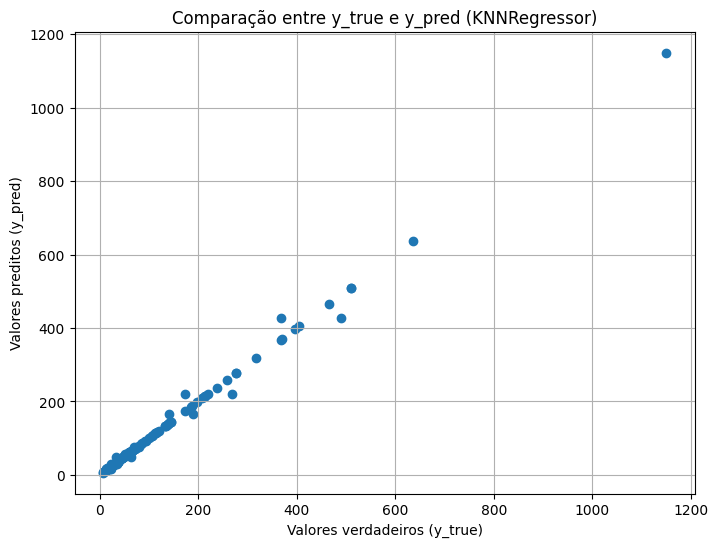

In [12]:
import matplotlib.pyplot as plt

y_true = test_ds.y
y_pred = y_pred

plt.figure(figsize=(8, 6))

# Scatter plot: y_true vs y_pred
plt.scatter(y_true, y_pred)

plt.title("Comparação entre y_true e y_pred (KNNRegressor)")
plt.xlabel("Valores verdadeiros (y_true)")
plt.ylabel("Valores preditos (y_pred)")
plt.grid(True)

plt.show()
